In [2]:
import numpy as np

In [3]:
import matplotlib
import matplotlib.pyplot as plt

In [4]:
import scipy

In [5]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
import pandas as pd

In [7]:
import seaborn as sns

In [8]:
filepath = './data/'

In [1]:
import urllib
import json
from IPython.display import display, Markdown

def generate_toc(notebook_path, indent_char="&emsp;"):
    is_markdown = lambda it: "markdown" == it["cell_type"]
    is_title = lambda it: it.strip().startswith("#") and it.strip().lstrip("#").lstrip()
    
    # Load the notebook JSON
    with open(notebook_path, 'r', encoding='utf-8') as in_f: # Use 'utf-8-sig' if necessary
        nb_json = json.load(in_f)
    
    toc_lines = []
    for cell in filter(is_markdown, nb_json["cells"]):
        for line in filter(is_title, cell["source"]):
            line = line.strip()
            indent = indent_char * (line.index(" ") - 1)
            title = line.lstrip("#").lstrip()
            url = urllib.parse.quote(title.replace(" ", "-"))
            out_line = f"{indent}[{title}](#{url})<br>\n"
            toc_lines.append(out_line)
    
    # Join the lines into a single string
    toc_output = ''.join(toc_lines)
    
    # Display the TOC in the Jupyter notebook cell
    display(Markdown(toc_output))

# Call the function with the path to your notebook
generate_toc('numerical.ipynb')

[`numpy`](#%60numpy%60)<br>
&emsp;[numpy arrays - ndarray](#numpy-arrays---ndarray)<br>
&emsp;[vectorized functions](#vectorized-functions)<br>
&emsp;[broadcasting](#broadcasting)<br>
&emsp;[indexing and slicing](#indexing-and-slicing)<br>
&emsp;[reshaping](#reshaping)<br>
[`scipy`](#%60scipy%60)<br>
[symbolic computation with `sympy`](#symbolic-computation-with-%60sympy%60)<br>


In [ ]:
%pip install jupyter_contrib_nbextensions
!jupyter contrib nbextension install --user
!jupyter nbextension enable toc2/main

# `numpy`

https://numpy.org/

In [2]:
import numpy as np

In [48]:
np.__version__

'2.0.0'

In [260]:
np.cos(0.5)

np.float64(0.8775825618903728)

## numpy arrays - ndarray

The core functionality of NumPy is the `ndarray` class, a multidimensional (n-dimensional) array. All elements of the array must be of the same type

In [16]:
x = np.array([[1, 2, 3], [4, 5, 6]])
x

array([[1, 2, 3],
       [4, 5, 6]])

In [17]:
print("x:\n{}".format(x))

x:
[[1 2 3]
 [4 5 6]]


In [265]:
print("printing the list [1,2,3]: ", [1, 2, 3])
print("printing the array np.array([1,2,3]): ", np.array([1, 2, 3]))
# the difference is numpy array elements are separeted by spaces rather than commas

printing the list [1,2,3]:  [1, 2, 3]
printing the array np.array([1,2,3]):  [1 2 3]


In [264]:
print("np.arange(5) gives: ", np.arange(5))
print("np.arange(0,3.5,.5) gives: ", np.arange(0, 3.2, 0.5))
# array from 0 to 3.5 steps 0.5 (excluding 7)
# np.arange(start,stop,step) is very similar to the list function range(start,stop,step)

np.arange(5) gives:  [0 1 2 3 4]
np.arange(0,3.5,.5) gives:  [0.  0.5 1.  1.5 2.  2.5 3. ]


In [266]:
print("np.linspace(0,8,6) gives: ", np.linspace(0, 8, 6))
# create array with 6 values between 0 and 8

np.linspace(0,8,6) gives:  [0.  1.6 3.2 4.8 6.4 8. ]


In [267]:
print("array with zeros: ", np.zeros(5))  # generate array with 5 zeros
print("array with ones: ", np.ones([2, 1]))
# generate two rows and one column, with ones

array with zeros:  [0. 0. 0. 0. 0.]
array with ones:  [[1.]
 [1.]]


In [268]:
print("array with random values: ", np.random.random([1, 2]))
# generate random numbers in one row and two columns, in interval (0,1)

array with random values:  [[0.24452965 0.85958015]]


In [269]:
A = np.array([[1, 2, 3], [4, 5, 6]])
print("A = ", A)
print("Data type of A is: ", A.dtype)
print("dimension of A is:", A.ndim)
print("shape of A is: ", A.shape)
print("size of A is: ", A.size)

A =  [[1 2 3]
 [4 5 6]]
Data type of A is:  int64
dimension of A is: 2
shape of A is:  (2, 3)
size of A is:  6


In [270]:
u = np.linspace(0, 1, 5)
print("u = ", u)
print("Data type of u is: ", u.dtype, "\n")

u =  [0.   0.25 0.5  0.75 1.  ]
Data type of u is:  float64 



## vectorized functions

In [271]:
x = np.arange(0, 1.25, 0.25)
np.sin(2 * np.pi * x)

array([ 0.0000000e+00,  1.0000000e+00,  1.2246468e-16, -1.0000000e+00,
       -2.4492936e-16])

In [272]:
np.mean([5, 6, 7])  # mean/average of [5, 6, 7]

np.float64(6.0)

In [273]:
np.argmax([5, 6, 7])  # find the index of the maximum element in the array
# gives the value of the index 2 (identifies the 3rd element in the array as the max value)

np.int64(2)

## broadcasting

eg. adding a vector to each row of a matrix

In [274]:
## without broadcasting (using explicit loops)

# Define a 2D array (matrix)
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Define a 1D array (vector)
vector = np.array([10, 20, 30])

# Initialize an empty array to store the result
result = np.zeros_like(matrix)

# Add the vector to each row of the matrix using loops
for i in range(matrix.shape[0]):
    result[i, :] = matrix[i, :] + vector

print("Result without broadcasting:")
print(result)

Result without broadcasting:
[[11 22 33]
 [14 25 36]
 [17 28 39]]


In [275]:
## with broadcasting (using vectorized operations)

# Define a 2D array (matrix)
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Define a 1D array (vector)
vector = np.array([10, 20, 30])

# Add the vector to each row of the matrix using broadcasting
result = matrix + vector

print("Result with broadcasting:")
print(result)

Result with broadcasting:
[[11 22 33]
 [14 25 36]
 [17 28 39]]


Array functions apply to multi-dimensional arrays as well, but we have to choose along which axis of the array to apply the function

In [276]:
M = np.array([[2, 4, 2], [2, 1, 1], [3, 2, 0]])

print("Sum of all elements in M:", np.sum(M))

print("Sum of the columns:", np.sum(M, axis=0))  # sum of elements along axis 0

np.sum(M, axis=1)  # sum of the rows

Sum of all elements in M: 17
Sum of the columns: [7 7 3]


array([8, 4, 5])

## indexing and slicing

In [277]:
import pprint

In [278]:
pp = pprint.PrettyPrinter(width=41, compact=True)

In [279]:
v = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("array v = ")
pp.pprint(v)

array v = 
array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])


In [280]:
print("The third element v[2] = ", v[2])
print("The element at row index 1 and column index 2=", v[1][2])
print("The element v[1,0] = ", v[1, 0])

The third element v[2] =  [7 8 9]
The element at row index 1 and column index 2= 6
The element v[1,0] =  4


In [281]:
print("The column with index 0 = ", v[:, 0])
print("The row with index 2 = ", v[2, :])

The column with index 0 =  [1 4 7]
The row with index 2 =  [7 8 9]


In [282]:
print("The sub-matrix v[1:3, 1:3] = ", v[1:3, 1:3])

The sub-matrix v[1:3, 1:3] =  [[5 6]
 [8 9]]


## reshaping

**general reshaping**

`reshape()` changes the shape of an array to any desired shape

`np.reshape(a, newshape, order='C')`
* newshape: Desired shape. Can be an integer or a tuple of integers.
* order: {'C', 'F', 'A'}, optional. Specifies the order to read/write the elements

In [8]:
# Original 1D array
a = np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [10]:
# Reshape to 3x4
b = a.reshape((3, 4))
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [11]:
# Reshape to 2x2x3
c = a.reshape((2, 2, 3))
c

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])

**flattening** (reshaping to 1D)

Both `flatten` and `ravel` convert multi-dimensional arrays into 1D arrays. The difference is that flatten returns a copy, whereas ravel returns a view when possible

`X = X.flatten()` reshapes the array X from a higher-dimensional array (typically 2D or more) into a 1D array. Specifically, it converts a multi-dimensional array into a single, contiguous 1D array by collapsing all the dimensions.

In [3]:
X = np.array([[1, 2],
              [3, 4],
              [5, 6]])

In [5]:
X.shape # 2D array X with a shape of (n_samples, n_features)=(3,2)

(3, 2)

In [7]:
X_flat = X.flatten()
X_flat

array([1, 2, 3, 4, 5, 6])

In [16]:
a = np.array([[1, 2, 3],
              [4, 5, 6]])

In [17]:
# Using flatten
flattened = a.flatten()
flattened

array([1, 2, 3, 4, 5, 6])

In [18]:
# Modify the flattened array
flattened[0] = 100
print("Modified flattened array:", flattened)
print("Original array after modifying flattened:", a)

Modified flattened array: [100   2   3   4   5   6]
Original array after modifying flattened: [[1 2 3]
 [4 5 6]]


`ravel`, if possible, returns a `view` (i.e., a reference to the original data). If not, it returns a copy. If a view is returned, modifying the flattened array will affect the original array.

In [19]:
# Using ravel

a = np.array([[1, 2, 3],
              [4, 5, 6]])

raveled = a.ravel()
raveled

array([1, 2, 3, 4, 5, 6])

In [20]:
# Modify the raveled array
raveled[0] = 100
print("Modified raveled array:", raveled)
print("Original array after modifying raveled:", a)

Modified raveled array: [100   2   3   4   5   6]
Original array after modifying raveled: [[100   2   3]
 [  4   5   6]]


**rearranging the axes**

Both `transpose` and `swapaxes` are used to rearrange the axes of an array

`transpose` can rearrange all axes of an array in any order
* accepts a tuple specifying the desired order of axes

In [22]:
# Original 2D array
a = np.array([[1, 2, 3],
              [4, 5, 6]])

In [23]:
transposed = a.transpose()
transposed

array([[1, 4],
       [2, 5],
       [3, 6]])

In [25]:
# original 3D array
a = np.arange(24).reshape((2, 3, 4))
a

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [27]:
# Transpose by rearranging axes
transposed = a.transpose((1, 0, 2))
transposed
# The axes are reordered from (0, 1, 2) to (1, 0, 2), effectively swapping the first two axes

array([[[ 0,  1,  2,  3],
        [12, 13, 14, 15]],

       [[ 4,  5,  6,  7],
        [16, 17, 18, 19]],

       [[ 8,  9, 10, 11],
        [20, 21, 22, 23]]])

In [28]:
# Transpose with a different axis order
transposed = a.transpose((2, 1, 0))
transposed

array([[[ 0, 12],
        [ 4, 16],
        [ 8, 20]],

       [[ 1, 13],
        [ 5, 17],
        [ 9, 21]],

       [[ 2, 14],
        [ 6, 18],
        [10, 22]],

       [[ 3, 15],
        [ 7, 19],
        [11, 23]]])

`swapaxes` is designed to swap exactly two axes
* takes two integers representing the axes to swap

In [29]:
a = np.array([[1, 2, 3],
              [4, 5, 6]])

In [30]:
# Swap axes 0 and 1
swapped = a.swapaxes(0, 1)
swapped

array([[1, 4],
       [2, 5],
       [3, 6]])

In [31]:
a = np.arange(24).reshape((2, 3, 4))
a

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [32]:
# Swap axes 0 and 2
swapped = a.swapaxes(0, 2)
swapped

array([[[ 0, 12],
        [ 4, 16],
        [ 8, 20]],

       [[ 1, 13],
        [ 5, 17],
        [ 9, 21]],

       [[ 2, 14],
        [ 6, 18],
        [10, 22]],

       [[ 3, 15],
        [ 7, 19],
        [11, 23]]])

**adding and removing dimensions** (without changing the data)

`np.newaxis` or `None` can be used to add new dimensions

In [39]:
a = np.array([1, 2, 3])
a

array([1, 2, 3])

In [36]:
# Add a new axis to make it a column vector
a_col = a[:, np.newaxis]
a_col

array([[1],
       [2],
       [3]])

In [38]:
# Add a new axis to make it a row vector
a_row = a[np.newaxis, :]
a_row

array([[1, 2, 3]])

`np.squeeze` removes single-dimensional entries from the shape

In [40]:
a = np.array([[[1, 2, 3]]])  # Shape (1, 1, 3)
a

array([[[1, 2, 3]]])

In [41]:
squeezed = np.squeeze(a)
squeezed

array([1, 2, 3])

**stacking**

In [283]:
x = np.array([1, 1, 1])
y = np.array([2, 2, 2])
print("array x = ", x)
print("array y = ", y)
print("vertical stack of x,y,x = ", np.vstack((x, y, x)))
print("horizontal stack of x,y,x = ", np.hstack((x, y, x)))

array x =  [1 1 1]
array y =  [2 2 2]
vertical stack of x,y,x =  [[1 1 1]
 [2 2 2]
 [1 1 1]]
horizontal stack of x,y,x =  [1 1 1 2 2 2 1 1 1]


# `scipy`

* https://lectures.scientific-python.org/

**SciPy** - Fundamental algorithms for scientific computing in Python

https://scipy.org/

In [8]:
import scipy

In [9]:
scipy.__version__

'1.14.0'

**sparse matrix**

In [10]:
# Create a 2D NumPy array with a diagonal of ones, and zeros everywhere else
eye = np.eye(4)
eye

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [11]:
# Convert the NumPy array to a SciPy sparse matrix in CSR format
# Only the nonzero entries are stored
sparse_matrix = scipy.sparse.csr_matrix(eye)
sparse_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4 stored elements and shape (4, 4)>

In [12]:
print(sparse_matrix)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4 stored elements and shape (4, 4)>
  Coords	Values
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


Usually it is not possible to create dense representations of sparse data (as they would not fit into memory), so we need to create sparse representations directly. 

Here is a way to create the same sparse matrix as before, using the COO format

In [13]:
data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo = scipy.sparse.coo_matrix((data, (row_indices, col_indices)))

In [14]:
print(eye_coo)

<COOrdinate sparse matrix of dtype 'float64'
	with 4 stored elements and shape (4, 4)>
  Coords	Values
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


# symbolic computation with `sympy`

SymPy is a Python library for symbolic mathematics. It aims to become a full-featured computer algebra system (CAS)

https://www.sympy.org/en/index.html

Symbolic Computation involves using a computer to help find closed-form solutions to differential equations, integrals, eigenvalues, and many more types of symbolic evaluations.

For example, we can enter the equation or integral we want solved, and the computer program returns a closed form solution, if it exists.

In [301]:
"""
Maria throws a ball straight up with an initial speed v0 = 5 m/s.
Symbollically find (solve for) the maximum height reached by the ball
"""

"""
equations of motion
y = v0*t - (1/2)*g*t^2
v(t) = v0 - g*t

By setting the speed v(t) = v0 - g*t = 0 at the maximum height reached by the ball, we
find the corresponding time t = v0/g. Substituting this value of t into the position equation
we find the maximum height ymax = v0*(v0/g) - (1/2)*g*(v0/g)^2 = v0^2/(2*g)
"""

'\nequations of motion\ny = v0*t - (1/2)*g*t^2\nv(t) = v0 - g*t\n\nBy setting the speed v(t) = v0 - g*t = 0 at the maximum height reached by the ball, we\nfind the corresponding time t = v0/g. Substituting this value of t into the position equation\nwe find the maximum height ymax = v0*(v0/g) - (1/2)*g*(v0/g)^2 = v0^2/(2*g)\n'

In [303]:
%pip install sympy

   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ------------- -------------------------- 2.1/6.2 MB 13.0 MB/s eta 0:00:01
   ------------------------------ --------- 4.7/6.2 MB 13.6 MB/s eta 0:00:01
   ---------------------------------------- 6.2/6.2 MB 13.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/536.2 kB ? eta -:--:--
   ---------------------------------------- 536.2/536.2 kB 8.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [304]:
from sympy import symbols, solve

In [305]:
vo, t, g = symbols("vo, t, g ", real=True)  # define variables
# real=True means they are real variables

In [306]:
# solve equation for tmax symbolically using solve() function
tmax = solve(vo - g * t, t)[0]
print("Time to reach max height=", tmax)

Time to reach max height= vo/g


In [307]:
y = vo * t - g * t**2 / 2
# substitute tmax in y(t) to find ymax, using method .subs
print("Max height reached = ", y.subs(t, tmax))

Max height reached =  vo**2/(2*g)


**lambdify()** - combine the results from NumPy and SymPy libraries

https://docs.sympy.org/latest/modules/utilities/lambdify.html

In [308]:
"""
Use SymPy to evaluate the symbolic derivative of the function f = a sin(b t) with respect to time t, 
Plot the function f(t) and its derivative in the interval t = 0 to t = 6. 
Use the numerical values a = 1 and b = 2.
"""

'\nUse SymPy to evaluate the symbolic derivative of the function f = a sin(b t) with respect to time t, \nPlot the function f(t) and its derivative in the interval t = 0 to t = 6. \nUse the numerical values a = 1 and b = 2.\n'

In [309]:
from sympy import symbols, sin, diff
from sympy.utilities.lambdify import lambdify

In [310]:
# define symbols
a, b, t = symbols("a,b,t", real=True)

In [311]:
f = a * sin(b * t)
deriv = diff(f, t)  # evaluate symbolic derivarive of f
print("Symbolic Derivative v=dy/dt: ", deriv)

Symbolic Derivative v=dy/dt:  a*b*cos(b*t)


In [312]:
# substitute a=1 and b=2 in f, using the .subs method
y = lambdify(t, f.subs({a: 1, b: 2}))

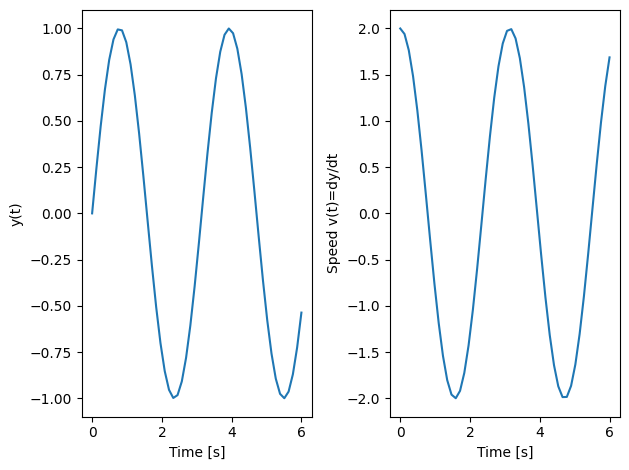

In [314]:
# plot y(t) and v(t)
plt.subplot(1, 2, 1)  # first subplot, positions y(t)
tims = np.linspace(0, 6, 50)  # sequence of times tims
plt.plot(tims, y(tims))
plt.xlabel("Time [s]")
plt.ylabel("y(t)")

u = deriv.subs({a: 1, b: 2})  # substitute a=1 and b=2 in deriv
v = lambdify(t, u)  # lambdify creates derivative function v(t)
plt.subplot(1, 2, 2)  # second subplot, speed v(t)
plt.plot(tims, v(tims))
plt.xlabel("Time [s]")
plt.ylabel("Speed v(t)=dy/dt")
plt.tight_layout()  # create the 2 subplots with thight layout
plt.show()